In [1]:
%display latex

# First Order ODE

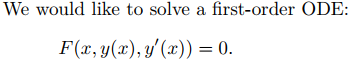

## Linear Equations

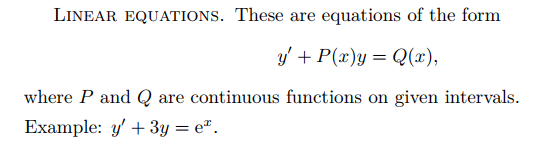

In [2]:
x = var('x')
y = function('y')(x)

In [3]:
eqn = diff(y, x) + 3 * y == e^x
eqn

3*y(x) + diff(y(x), x) == e^x

In [4]:
desolve(eqn, y, show_method=True)

[1/4*(4*_C + e^(4*x))*e^(-3*x), 'linear']

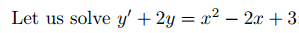

In [5]:
x, y = var('x'), function('y')(x)

DE = diff(y, x) + 2 * y == x ^2 - 2 * x + 3
DE

2*y(x) + diff(y(x), x) == x^2 - 2*x + 3

In [6]:
desolve(DE, y)

1/4*((2*x^2 - 2*x + 1)*e^(2*x) - 2*(2*x - 1)*e^(2*x) + 4*_C + 6*e^(2*x))*e^(-2*x)

In [7]:
desolve(DE, y).expand()

1/2*x^2 + _C*e^(-2*x) - 3/2*x + 9/4

Adding initial conditions e.g. $y(0) = 1$:

In [8]:
desolve(DE, y, ics=[0, 1]).expand()

1/2*x^2 - 3/2*x - 5/4*e^(-2*x) + 9/4

Note:

ics = [0, 0] => (x, y(x)) => (0, 1)

## Separable Equations

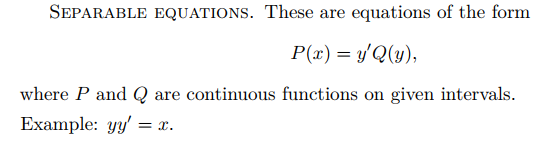

In [9]:
x, y = var('x'), function('y')(x)

In [10]:
eqn = y * diff(y, x) == x
eqn

y(x)*diff(y(x), x) == x

In [11]:
desolve(eqn, y, show_method=True)

[1/2*y(x)^2 == 1/2*x^2 + _C, 'separable']

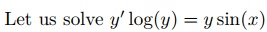

In [12]:
x, y = var('x'), function('y')(x)
DE = diff(y, x) * log(y) == y * sin(x)
DE

log(y(x))*diff(y(x), x) == sin(x)*y(x)

In [13]:
soln = desolve(DE, y)
soln

1/2*log(y(x))^2 == _C - cos(x)

Express solution in terms of $y(x)$:

In [14]:
soln_y = solve(soln, y)
soln_y

[y(x) == e^(-sqrt(2*_C - 2*cos(x))), y(x) == e^(sqrt(2*_C - 2*cos(x)))]

Graphing the solution:

Eg. graph the first solution with $C=5$:

In [15]:
# get a reference to the C variable
C, _ = soln_y[0].variables()

eqn = soln_y[0].rhs()
eqn

e^(-sqrt(2*_C - 2*cos(x)))

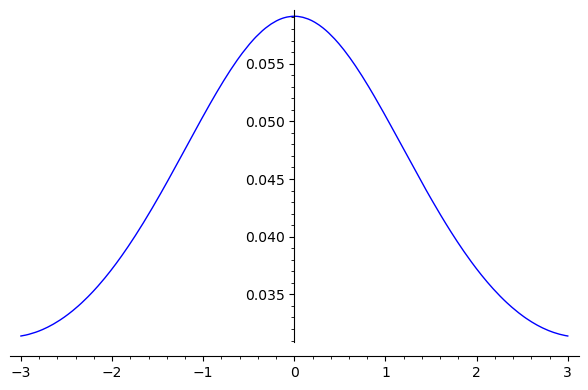

In [16]:
plot(eqn.substitute(C == 5), x, -3, 3)

To plot with multiple solutions:

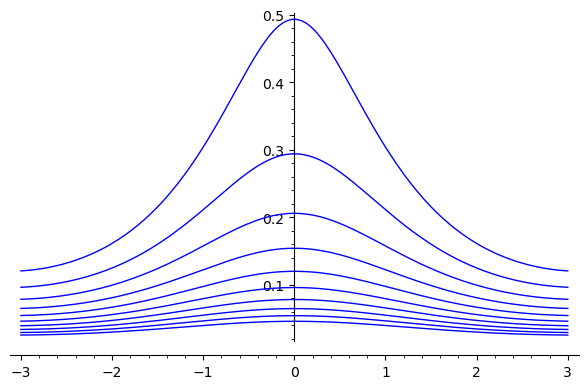

In [17]:
P = Graphics()

for k in range(1, 20, 2):
    P += plot(eqn.substitute(C == 1 + k/4), x, -3, 3)

P

## Bernouli Equations

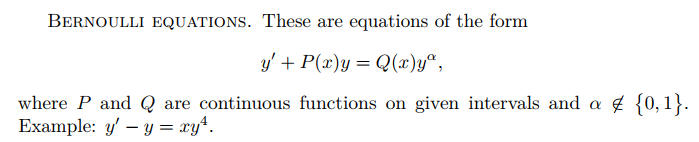

In [18]:
x, y = var('x'), function('y')(x)

In [19]:
eqn = diff(y, x) - y == x*y^4
eqn

-y(x) + diff(y(x), x) == x*y(x)^4

In [20]:
desolve(eqn, y, show_method = True)

[e^x/(-1/3*(3*x - 1)*e^(3*x) + _C)^(1/3), 'bernoulli']

## Homogenous Equations

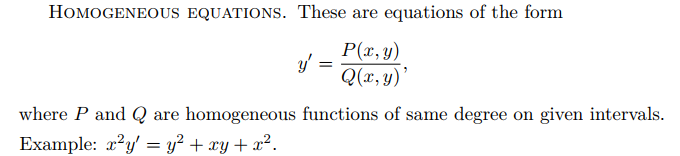

In [21]:
x, y = var('x'), function('y')(x)

In [22]:
eqn = x^2 * diff(y, x) == y^2 + x * y + x^2
eqn

x^2*diff(y(x), x) == x^2 + x*y(x) + y(x)^2

In [23]:
desolve(eqn, y, show_method=True)

[_C*x == e^(arctan(y(x)/x)), 'homogeneous']

## Exact Equations

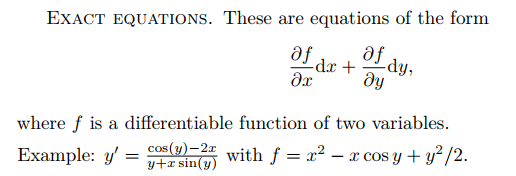

In [24]:
x, y = var('x'), function('y')(x)

In [25]:
eqn = diff(y, x) == (cos(y) - 2 * x)/(y + x * sin(y))
eqn

diff(y(x), x) == -(2*x - cos(y(x)))/(x*sin(y(x)) + y(x))

In [26]:
desolve(eqn, y, show_method=True)

[x^2 - x*cos(y(x)) + 1/2*y(x)^2 == _C, 'exact']

## Riccati Equations

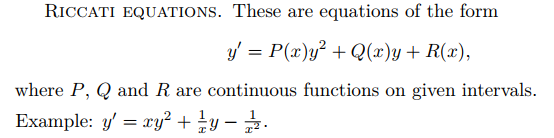

In [27]:
x, y = var('x'), function('y')(x)

In [28]:
eqn = diff(y, x) == x * y ^2 + 1/x * y - 1/x^2
eqn

diff(y(x), x) == x*y(x)^2 + y(x)/x - 1/x^2

In [29]:
try:
    desolve(eqn, y, show_method=True)
except NotImplementedError as e:
    print(e)

Maxima was unable to solve this ODE. Consider to set option contrib_ode to True.


Try with more complex methods:

In [30]:
desolve(eqn, y, show_method=True, contrib_ode=True)

[[y(x) == -1/2*((_C*(bessel_Y(4, 2*sqrt(-x)) - bessel_Y(2, 2*sqrt(-x))) + bessel_J(4, 2*sqrt(-x)) - bessel_J(2, 2*sqrt(-x)))*x + 3*(_C*bessel_Y(3, 2*sqrt(-x)) + bessel_J(3, 2*sqrt(-x)))*sqrt(-x))/((_C*bessel_Y(3, 2*sqrt(-x)) + bessel_J(3, 2*sqrt(-x)))*sqrt(-x)*x^2)],
 'riccati']

## Lagrange And Clairaut Equations

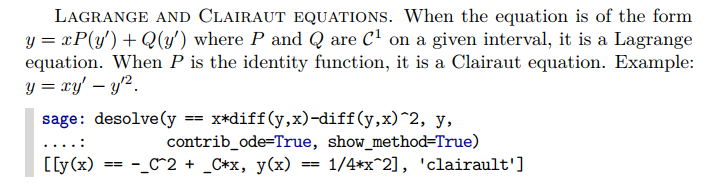

# Partial Differential Equations

In [31]:
from sympy import pdsolve
import sympy

In [32]:
x, y = var('x y')
u = function('u')(x, y)

In [33]:
# unsupported pde!
eqn1 = diff(u, x, 2) - diff(u, y, 2) == 0
eqn1

diff(u(x, y), x, x) - diff(u(x, y), y, y) == 0

In [34]:
# # support pde
# eqn1 = 1 + 2 * diff(u, x) + 3 * diff(u, y) == 0
# eqn1

In [35]:
try:
    pdsolve(eqn1._sympy_())
except NotImplementedError as e:
    print(e)

psolve: Cannot solve Derivative(u(x, y), (x, 2)) - Derivative(u(x, y), (y, 2))


In [36]:
# # to get a list of hints (when the pde is supported)
# sympy.classify_pde(eqn1._sympy_())
# pdsolve(eqn1._sympy_(), hint='all')

What is implemented in Sympy? See [here](https://stackoverflow.com/questions/47995177/is-it-possible-to-solve-a-system-of-pdes-using-sympy-in-python).

Using Maple:

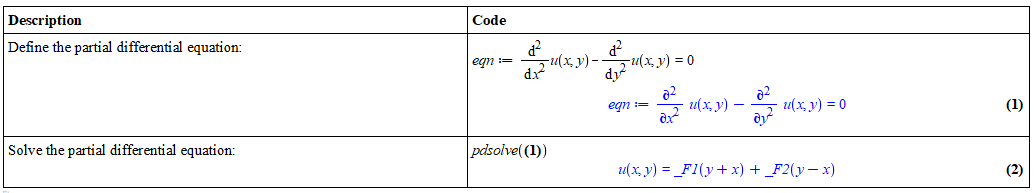